## Multiclass classification. Dry Bean dataset.

### 1. Data loading and Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler


In [2]:
arff_file = arff.loadarff('/Users/maksimnoskov/Documents/tsi_term2/ml_pa_project/Dry_Bean_Dataset.arff')
data = pd.DataFrame(arff_file[0])

In [3]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,b'SEKER'
1,28734.0,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,b'SEKER'
2,29380.0,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,b'SEKER'
3,30008.0,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,b'SEKER'
4,30140.0,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,b'SEKER'


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  float64
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  float64
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
# Check for 0 values

(data == 0).sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [6]:
data.rename(columns={'AspectRation': 'AspectRatio'}, inplace=True)

Variable *Class* is my target variable. Checking how many classes do I have in my data and the spread of classes:

In [7]:
data['Class'].value_counts()

Class
b'DERMASON'    3546
b'SIRA'        2636
b'SEKER'       2027
b'HOROZ'       1928
b'CALI'        1630
b'BARBUNYA'    1322
b'BOMBAY'       522
Name: count, dtype: int64

In [8]:
# I don't like the format of the values in the column Class. Decided to transform these values into str format

data['Class'] = data['Class'].str.decode('utf-8')

In [9]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


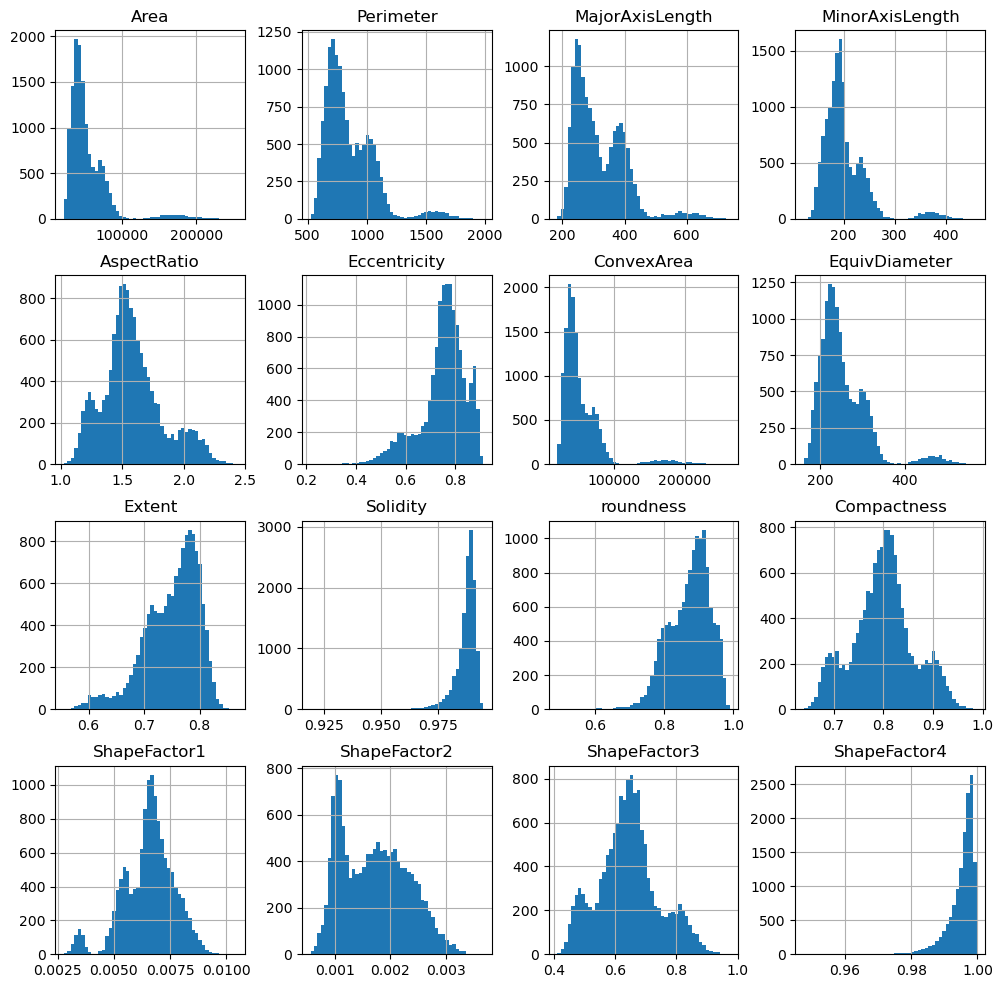

In [10]:
data.hist(bins=50, figsize=(12, 12))
plt.show()

Creating a density matrix (density plot)

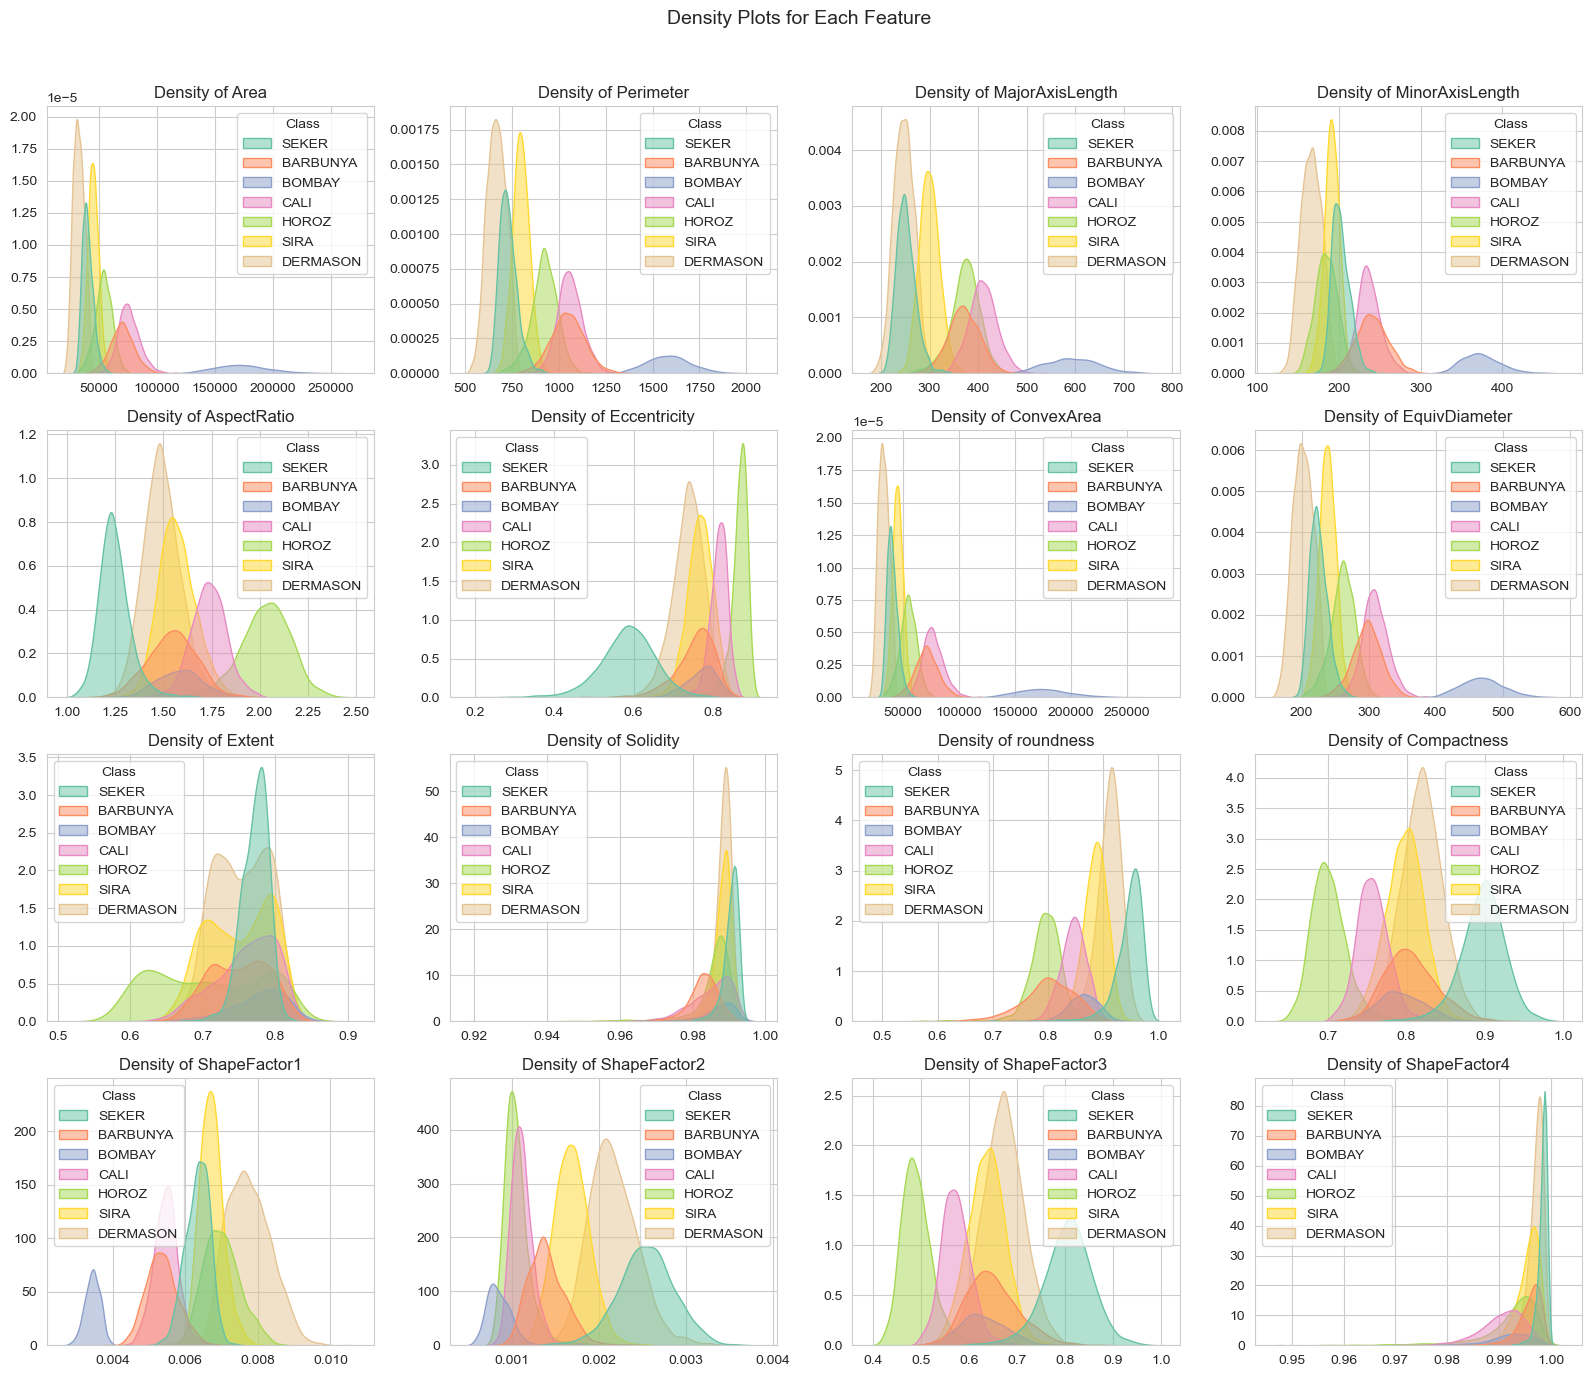

In [11]:
sns.set_style("whitegrid")

labels = data["Class"]
features = data.drop("Class", axis=1)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 14))  # Adjust the figure size as needed
fig.suptitle('Density Plots for Each Feature', fontsize=14)

axes = axes.flatten()

for i, feature in enumerate(features.columns):
    sns.kdeplot(data=data, x=feature, hue="Class", fill=True, ax=axes[i], palette="Set2", alpha=0.5)
    axes[i].set_title(f'Density of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the rectangle in tight_layout
plt.show()

Splitting Dataset into training, validation, and test sets.

In [ ]:
# Split into training (80%) and test (20%) sets using Stratified Sampling

train_features, test_features, train_labels, test_labels = train_test_split(
    features, 
    labels, 
    test_size=0.20,
    random_state=42, 
    stratify=labels 
)

In [13]:
# Split training data into Training (90%) and Validation (10%) sets

train_features, val_features, train_labels, val_labels = train_test_split(
    train_features,
    train_labels,
    test_size=0.10,
    random_state=42,
    stratify=train_labels
)

Data transformation pipeline 

In [22]:
def log_transform(x):
    return np.log(x)

log_transformer = FunctionTransformer(log_transform)

def boxcox_transform(x):
    if isinstance(x, pd.DataFrame):
        x = x.values

    x_positive = x + 0.1 
    x_transformed = np.zeros_like(x_positive)
    
    for i in range(x.shape[1]):
        x_transformed[:, i], _ = stats.boxcox(x_positive[:, i])
    return x_transformed

boxcox_transformer = FunctionTransformer(boxcox_transform)

log_columns = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 
               'ConvexArea', 'EquivDiameter']
boxcox_columns = ['Eccentricity', 'Solidity', 'roundness', 'ShapeFactor4']
standardize_columns = log_columns + boxcox_columns + ['AspectRatio', 'Extent', 'Compactness',
                                                      'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3']

preprocessor = ColumnTransformer(
    transformers=[
        ('log', log_transformer, log_columns),
        ('boxcox', boxcox_transformer, boxcox_columns),],
    remainder='passthrough')

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
])


Applying the Pipeline:
* Fit and transform tarin_features
* Transform val_features and test_features 

In [23]:
pipeline.fit(train_features)
train_features_transformed = pipeline.transform(train_features)

Checking histograms for transformed train_features

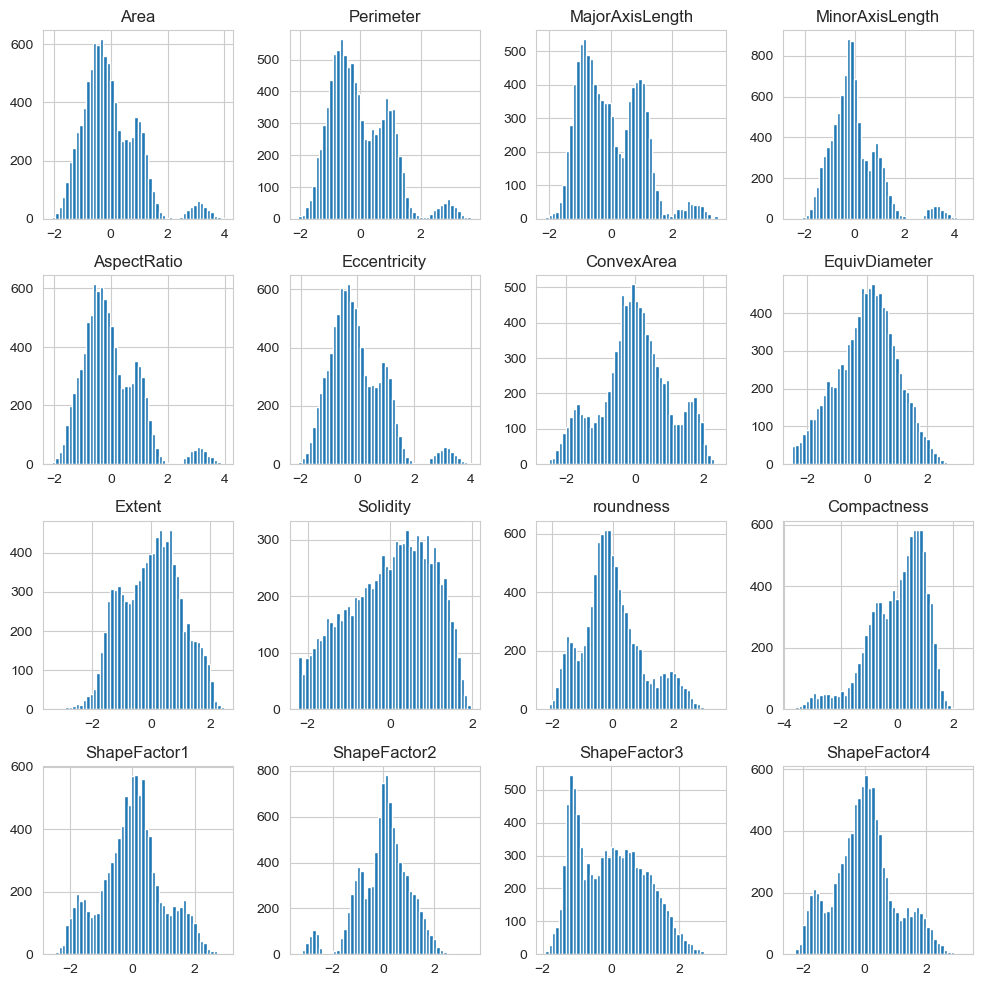

In [25]:
column_names = train_features.columns
train_features_transformed_df = pd.DataFrame(train_features_transformed, columns=column_names)

train_features_transformed_df.hist(bins=50, figsize=(12, 12))
plt.show()

In [26]:
val_features_transformed = pipeline.transform(val_features)
test_features_transformed = pipeline.transform(test_features)

Training and validating different classifiers using train_features_transformed and val_features_transformed

In [32]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


In [28]:
svm_clf = SVC(kernel='linear')  
dt_clf = DecisionTreeClassifier(random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=10)

In [29]:
svm_clf.fit(train_features_transformed, train_labels)
dt_clf.fit(train_features_transformed, train_labels)
knn_clf.fit(train_features_transformed, train_labels)

KNeighborsClassifier(n_neighbors=10)

In [30]:
svm_predictions = svm_clf.predict(val_features_transformed)
dt_predictions = dt_clf.predict(val_features_transformed)
knn_predictions = knn_clf.predict(val_features_transformed)

In [31]:
print("SVM Accuracy:", accuracy_score(val_labels, svm_predictions))
print("Decision Tree Accuracy:", accuracy_score(val_labels, dt_predictions))
print("KNN Accuracy:", accuracy_score(val_labels, knn_predictions))

# Detailed classification report
print("\nClassification Report for SVM:")
print(classification_report(val_labels, svm_predictions))

print("Classification Report for Decision Tree:")
print(classification_report(val_labels, dt_predictions))

print("Classification Report for KNN:")
print(classification_report(val_labels, knn_predictions))

SVM Accuracy: 0.9219467401285583
Decision Tree Accuracy: 0.8879706152433425
KNN Accuracy: 0.9247015610651974

Classification Report for SVM:
              precision    recall  f1-score   support

    BARBUNYA       0.99      0.87      0.92       106
      BOMBAY       1.00      1.00      1.00        42
        CALI       0.92      0.95      0.94       130
    DERMASON       0.90      0.92      0.91       284
       HOROZ       0.94      0.98      0.96       154
       SEKER       0.99      0.92      0.95       162
        SIRA       0.85      0.88      0.86       211

    accuracy                           0.92      1089
   macro avg       0.94      0.93      0.94      1089
weighted avg       0.92      0.92      0.92      1089

Classification Report for Decision Tree:
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.83      0.88       106
      BOMBAY       1.00      1.00      1.00        42
        CALI       0.88      0.92      0.89       130
    

Adding two more classifiers: Random Forest and Multi_layer Perceptron.

In [33]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42)

In [34]:
rf_clf.fit(train_features_transformed, train_labels)
mlp_clf.fit(train_features_transformed, train_labels)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=42)

In [35]:
rf_predictions = rf_clf.predict(val_features_transformed)
mlp_predictions = mlp_clf.predict(val_features_transformed)

In [36]:
print("Random Forest Accuracy:", accuracy_score(val_labels, rf_predictions))
print("MLP Neural Network Accuracy:", accuracy_score(val_labels, mlp_predictions))

# Detailed classification reports
print("\nClassification Report for Random Forest:")
print(classification_report(val_labels, rf_predictions))

print("Classification Report for MLP Neural Network:")
print(classification_report(val_labels, mlp_predictions))

Random Forest Accuracy: 0.9393939393939394
MLP Neural Network Accuracy: 0.9265381083562901

Classification Report for Random Forest:
              precision    recall  f1-score   support

    BARBUNYA       0.98      0.88      0.93       106
      BOMBAY       1.00      1.00      1.00        42
        CALI       0.93      0.95      0.94       130
    DERMASON       0.94      0.93      0.94       284
       HOROZ       0.94      0.98      0.96       154
       SEKER       1.00      0.96      0.98       162
        SIRA       0.87      0.91      0.89       211

    accuracy                           0.94      1089
   macro avg       0.95      0.95      0.95      1089
weighted avg       0.94      0.94      0.94      1089

Classification Report for MLP Neural Network:
              precision    recall  f1-score   support

    BARBUNYA       0.99      0.88      0.93       106
      BOMBAY       1.00      1.00      1.00        42
        CALI       0.93      0.95      0.94       130
    DER